In [1]:
# reveal.js presentation configuration
from notebook.services.config import ConfigManager

cm = ConfigManager()
cm.update('livereveal', {
              'theme': 'league',
              'transition': 'fade',
              'center': 'false',
              'overview' : 'true',
              'start_slideshow_at': 'selected'
})

# import utility libraries
import numpy as np
from sklearn.decomposition import PCA
import pandas as pd
from matplotlib import pyplot as plt
plt.rcParams['figure.figsize'] = (15.0, 12.0)
pd.core.format.set_option('notebook_repr_html',True)
pd.set_option('display.max_rows', 10)

# pretty print function
def pp(obj):
    print pd.DataFrame(obj)
    
%matplotlib inline


# Playing with word2vec

[Fabio A. González](http://dis.unal.edu.co/~fgonza/), Universidad Nacional de Colombia

## Google News dataset

* Internal Google data set with one billion words
* 692k vocabulary. Words with frequency below 5 were discarded.
* 300-dimensions representation was obtained by training a skip-gram model.
* Model available at https://drive.google.com/file/d/0B7XkCwpI5KDYNlNUTTlSS21pQmM/edit?usp=sharing

## Loading the model with `gensim`

In [2]:
# import wrod2vec model from gensim
from gensim.models.word2vec import Word2Vec

# load Google News pre-trained network
model = Word2Vec.load_word2vec_format('GNvectors.bin', binary=True)

## Continuous representation of words

In [3]:
pp(model['table'])

            0
0   -0.053929
1   -0.009884
2    0.043909
3    0.079801
4   -0.015760
..        ...
295 -0.028604
296  0.026054
297 -0.035528
298 -0.036621
299 -0.004578

[300 rows x 1 columns]


## Semantically related words have similar representations

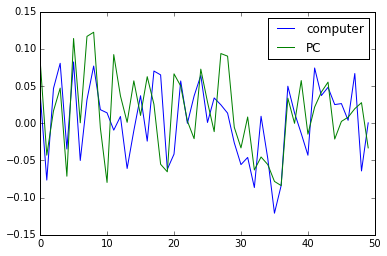

In [4]:
plt.plot(model['computer'][:50], label = 'computer')
plt.plot(model['PC'][:50], label = 'PC')
plt.legend()

# Vector representation similarity = semantic similarity

In [5]:
pp(model.most_similar(positive=[u'México']))

                     0         1
0               Mexico  0.696470
1  Guadalajara_Jalisco  0.662136
2            de_México  0.658323
3               Juárez  0.644176
4            Querétaro  0.643441
5               Ciudad  0.642256
6              América  0.637372
7        Ciudad_Juárez  0.627821
8              Mexican  0.624055
9               Puebla  0.620052


## Word vector space encodes linguistic regularities

<img width= 600 src="linguistic regularities.jpg">

## Solving analogies

* **man** is to **woman** as **king** is to **??**
* Relationships are encoded by word vector differences: 
$$ f(\textrm{"woman"}) - f(\textrm{"man"}) = f(\textrm{"??"}) - f(\textrm{"king"})$$
* We can add the relationship encoding vector to a the vector of **king**: $$ f(\textrm{"king"}) + (f(\textrm{"woman"}) - f(\textrm{"man"})) = f(\textrm{"??"}) $$

$$ f(\textrm{"king"}) + (f(\textrm{"woman"}) - f(\textrm{"man"})) = f(\textrm{"??"}) $$

In [6]:
result = model.most_similar(negative=['man'], 
                            positive=['hombre', 'king'])
pp(result)

           0         1
0     el_rey  0.476966
1      kings  0.466543
2  muchachos  0.465187
3    gigante  0.450011
4    caballo  0.449616
5    su_casa  0.446670
6     noches  0.446499
7      reyes  0.446085
8      queen  0.440055
9     libres  0.438366


## Finding country presidents

In [7]:
def plot_data(orig_data, labels):
    pca = PCA(n_components=2)
    data = pca.fit_transform(orig_data)
    plt.plot(data[:,0], data[:,1], '.')
    for i in range(len(data)):
        plt.annotate(labels[i], xy = data[i])
    for i in range(len(data)/2):
        plt.annotate("",
                xy=data[i],
                xytext=data[i+len(data)/2],
                arrowprops=dict(arrowstyle="->",
                                connectionstyle="arc3")
                )

In [9]:
def analogy(worda, wordb, wordc):
    result = model.most_similar(negative=[worda], 
                                positive=[wordb, wordc])
    return result[0][0]
countries = ['Mexico', 'Colombia', 'Brazil', 'Venezuela', 'France', 'Spain', 'Egypt', 'China']
presidents = [analogy('USA', 'President_Barack_Obama', country) for country in countries]
pp(zip(countries,presidents))

           0                          1
0     Mexico  President_Felipe_Calderon
1   Colombia     President_Alvaro_Uribe
2     Brazil      President_Luiz_Inacio
3  Venezuela      President_Hugo_Chavez
4     France  President_Nicolas_Sarkozy
5      Spain                   Zapatero
6      Egypt    President_Hosni_Mubarak
7      China         Premier_Wen_Jiabao


## President_of vector

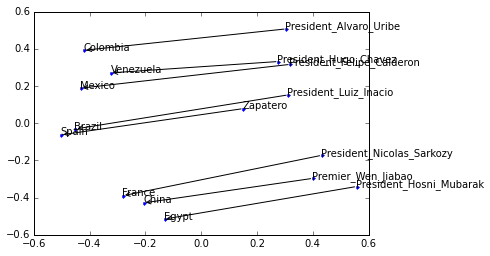

In [10]:
labels = countries + presidents
data = [model[w] for w in labels]
plot_data(data, labels)

## Compositionality

In [11]:
 pp(model.most_similar(positive=['Mexican', 'river']))

                          0         1
0                Rio_Grande  0.680104
1                     creek  0.599652
2               Rio_Conchos  0.582544
3                      lake  0.577315
4                 Río_Bravo  0.577050
5            Nogales_Sonora  0.572667
6                Los_Ebanos  0.571761
7         Mississippi_River  0.571416
8                Río_Grande  0.569076
9  Elephant_Butte_Reservoir  0.568977


#### Spanish WikiNews dataset

* Public data set with 94 million words
* 213k vocabulary (converted to lowercase, accents removed)
* 300-dimensions representation was obtained by training a cbow model

In [12]:
model_es = Word2Vec.load_word2vec_format('eswikinews.bin', binary=True)

In [29]:
 pp(model_es.most_similar(positive=['colombia']))

                       0         1
0                ecuador  0.710514
1              venezuela  0.708999
2             colombiana  0.692583
3             colombiano  0.659182
4            colombianos  0.648323
5                 panama  0.645448
6       colombia_ecuador  0.643332
7                 bogota  0.639413
8  territorio_colombiano  0.626844
9        bogota_colombia  0.610778


In [15]:
pp(model_es.most_similar(positive=['mexico', 'rio']))

                         0         1
0              rio_cazones  0.627588
1               rio_panuco  0.609811
2                rio_hondo  0.606067
3  tijuana_baja_california  0.584665
4               rio_grande  0.576329
5                 suchiate  0.575739
6           jalisco_mexico  0.567944
7             rio_suchiate  0.566281
8                rio_lerma  0.565931
9               rio_balsas  0.565855


In [16]:
result = model_es.most_similar(negative=['hombre'], 
                               positive=['mujer', 'rey'])
pp(result)

                 0         1
0            reina  0.726377
1      reina_viuda  0.713528
2             hija  0.607597
3          monarca  0.591574
4   hija_ilegitima  0.590024
5         desposar  0.585113
6  princesa_isabel  0.584336
7     futura_reina  0.583971
8      reina_madre  0.583860
9           esposa  0.582654


In [33]:
result = model_es.most_similar(negative=['colombia'], 
                               positive=['pablo_escobar', 'mexico'])
pp(result)


                    0         1
0            mexicana  0.511905
1  tampico_tamaulipas  0.506067
2        raul_salinas  0.504683
3        chimalpopoca  0.503021
4  gustavo_diaz_ordaz  0.492677
5          diaz_ordaz  0.485365
6            mexicano  0.485267
7        chapo_guzman  0.481808
8     narcotraficante  0.476969
9              cacama  0.470748


In [31]:
def analogia(worda, wordb, wordc):
    result = model_es.most_similar(negative=[worda], 
                                positive=[wordb, wordc])
    return result[0][0]
countries = ['grecia', 'colombia', 'chile', 'peru', 'argentina', 'francia', 'estados_unidos']
gentilicios = [analogia('mexico', 'mexicano', country) for country in countries]
pp(zip(countries,gentilicios))

                0               1
0          grecia        georgios
1        colombia      colombiano
2           chile         chileno
3            peru         peruano
4       argentina       argentino
5         francia         frances
6  estados_unidos  estadounidense


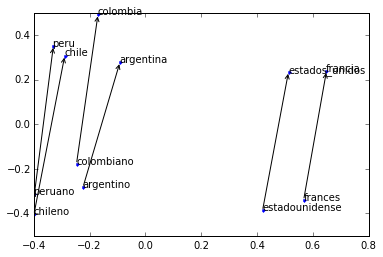

In [56]:
labels = countries + gentilicios
data = [model_es[w] for w in labels]
plot_data(data, labels)